
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics 
to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company 
has collected a data set from the sale of houses in Australia.
The company is looking at prospective properties to buy to enter the market. 

The company wants to know:
Which variables are significant in predicting the price of a house, and
How well those variables describe the price of a house.
Also, determine the optimal value of lambda for ridge and lasso regression.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from sklearn import metrics
from sklearn import linear_model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.options.display.max_columns = 100
pd.options.display.max_rows=100

C:\Users\tvss9\anaconda3\envs\adv_regression\lib\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


### Explore Data

In [2]:
raw_data = pd.read_csv('train.csv')


In [3]:
raw_data.shape

(1460, 81)

In [4]:
raw_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
raw_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
raw_data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

### Data Cleaning

In [8]:
# row duplicates
raw_data.drop_duplicates().shape, raw_data.shape 

((1460, 81), (1460, 81))

In [9]:
# columnwise duplicates - identify columns with one unique value excluding null
(raw_data.nunique()==1).sum()

0

In [10]:
# no row or column duplicates

In [11]:
# missing values
((raw_data.isnull().sum()/raw_data.shape[0])*100).round(2).sort_values(ascending=False)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageYrBlt       5.55
GarageCond        5.55
GarageType        5.55
GarageFinish      5.55
GarageQual        5.55
BsmtFinType2      2.60
BsmtExposure      2.60
BsmtQual          2.53
BsmtCond          2.53
BsmtFinType1      2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
Id                0.00
Functional        0.00
Fireplaces        0.00
KitchenQual       0.00
KitchenAbvGr      0.00
BedroomAbvGr      0.00
HalfBath          0.00
FullBath          0.00
BsmtHalfBath      0.00
TotRmsAbvGrd      0.00
GarageCars        0.00
GrLivArea         0.00
GarageArea        0.00
PavedDrive        0.00
WoodDeckSF        0.00
OpenPorchSF       0.00
EnclosedPorch     0.00
3SsnPorch         0.00
ScreenPorch       0.00
PoolArea          0.00
MiscVal           0.00
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleConditi

In [12]:
# lets drop the ones with > 15% missing values - seems like a natural number. The remaining missing values can be imputed by mean/median depending on type of variables

In [13]:
raw_data = raw_data.drop(columns = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage'])

In [14]:
na_col_list = ['GarageYrBlt','GarageCond','GarageType','GarageFinish','GarageQual','BsmtFinType2','BsmtExposure','BsmtQual','BsmtCond','BsmtFinType1','MasVnrArea','MasVnrType','Electrical']
for i in na_col_list:
    print("========= " + i + " =========")
    print(raw_data[i].value_counts(dropna=False,normalize=True))

========= GarageYrBlt =========
NaN       0.055479
2005.0    0.044521
2006.0    0.040411
2004.0    0.036301
2003.0    0.034247
2007.0    0.033562
1977.0    0.023973
1998.0    0.021233
1999.0    0.020548
1976.0    0.019863
2008.0    0.019863
2000.0    0.018493
1968.0    0.017808
2002.0    0.017808
1950.0    0.016438
1993.0    0.015068
1958.0    0.014384
1966.0    0.014384
2009.0    0.014384
1965.0    0.014384
1962.0    0.014384
2001.0    0.013699
1970.0    0.013699
1996.0    0.013699
1957.0    0.013699
1954.0    0.013014
1997.0    0.013014
1978.0    0.013014
1960.0    0.013014
1995.0    0.012329
1994.0    0.012329
1974.0    0.012329
1964.0    0.012329
1959.0    0.011644
1990.0    0.010959
1963.0    0.010959
1956.0    0.010959
1967.0    0.010274
1969.0    0.010274
1979.0    0.010274
1980.0    0.010274
1988.0    0.009589
1940.0    0.009589
1920.0    0.009589
1972.0    0.009589
1973.0    0.009589
1961.0    0.008904
1971.0    0.008904
1992.0    0.008904
1955.0    0.008904
1953.0    0.008219

In [15]:
raw_data.isna().any(axis=1).sum()/1460

0.08356164383561644

In [16]:
### Dropping 8% of data might be on the higher side. However, deeper analysis reveals that this is the data of the houses which do not
## have either a basement or a garage or both. However, the regression algorithms we are going to use cannot accommodate 
# na values. Hence lets drop these variables.

In [17]:
raw_data = raw_data[~raw_data.isna().any(axis=1)]

In [18]:
## Derived columns from dates
raw_data['YearsSinceBuilt'] = pd.datetime.now().year - raw_data['YearBuilt']
raw_data['YearsSinceRemod'] = pd.datetime.now().year - raw_data['YearRemodAdd']
raw_data['YearsSinceGarageBuilt'] = pd.datetime.now().year - raw_data['GarageYrBlt']

C:\Users\tvss9\AppData\Local\Temp/ipykernel_1004/773842643.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  raw_data['YearsSinceBuilt'] = pd.datetime.now().year - raw_data['YearBuilt']
C:\Users\tvss9\AppData\Local\Temp/ipykernel_1004/773842643.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  raw_data['YearsSinceRemod'] = pd.datetime.now().year - raw_data['YearRemodAdd']
C:\Users\tvss9\AppData\Local\Temp/ipykernel_1004/773842643.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  raw_data['YearsSinceGarageBuilt'] = pd.datetime.now().year - raw_data['GarageYrBlt']


### Exploratory Analysis

In [19]:
for i in raw_data.columns:
    print("'" +i + "',")

'Id',
'MSSubClass',
'MSZoning',
'LotArea',
'Street',
'LotShape',
'LandContour',
'Utilities',
'LotConfig',
'LandSlope',
'Neighborhood',
'Condition1',
'Condition2',
'BldgType',
'HouseStyle',
'OverallQual',
'OverallCond',
'YearBuilt',
'YearRemodAdd',
'RoofStyle',
'RoofMatl',
'Exterior1st',
'Exterior2nd',
'MasVnrType',
'MasVnrArea',
'ExterQual',
'ExterCond',
'Foundation',
'BsmtQual',
'BsmtCond',
'BsmtExposure',
'BsmtFinType1',
'BsmtFinSF1',
'BsmtFinType2',
'BsmtFinSF2',
'BsmtUnfSF',
'TotalBsmtSF',
'Heating',
'HeatingQC',
'CentralAir',
'Electrical',
'1stFlrSF',
'2ndFlrSF',
'LowQualFinSF',
'GrLivArea',
'BsmtFullBath',
'BsmtHalfBath',
'FullBath',
'HalfBath',
'BedroomAbvGr',
'KitchenAbvGr',
'KitchenQual',
'TotRmsAbvGrd',
'Functional',
'Fireplaces',
'GarageType',
'GarageYrBlt',
'GarageFinish',
'GarageCars',
'GarageArea',
'GarageQual',
'GarageCond',
'PavedDrive',
'WoodDeckSF',
'OpenPorchSF',
'EnclosedPorch',
'3SsnPorch',
'ScreenPorch',
'PoolArea',
'MiscVal',
'MoSold',
'YrSold',
'SaleType',
'Sale

In [20]:
raw_data

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,YearsSinceBuilt,YearsSinceRemod,YearsSinceGarageBuilt
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,19,19,19.0
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,46,46,46.0
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,21,20,21.0
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,107,52,24.0
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,22,22,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000,23,22,23.0
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000,44,34,44.0
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500,81,16,81.0
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,142125,72,26,7

In [21]:
id_cols=['Id']
num_cols = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF',
'2ndFlrSF',
'LowQualFinSF',
'GrLivArea',
'BsmtFullBath',
'BsmtHalfBath',
'FullBath',
'HalfBath',
'BedroomAbvGr',
'KitchenAbvGr','TotRmsAbvGrd','Fireplaces',

'GarageArea','WoodDeckSF',
'OpenPorchSF',
'EnclosedPorch',
'3SsnPorch',
'ScreenPorch',
'PoolArea',
'MiscVal',
'YearsSinceBuilt',
'YearsSinceRemod',
'YearsSinceGarageBuilt',
           ]
cat_cols = ['MSSubClass','MSZoning','LandContour','Street','LotShape',
'Utilities',
'LotConfig',
'LandSlope',
'Neighborhood',
'Condition1',
'Condition2',
'BldgType',
'HouseStyle',
'OverallQual',
'OverallCond','RoofStyle',
'RoofMatl',
'Exterior1st',
'Exterior2nd',
'MasVnrType',
'ExterQual',
'ExterCond',
'Foundation',
'BsmtQual',
'BsmtCond',
'BsmtExposure',
'BsmtFinType1',
'BsmtFinType2',
'Heating',
'HeatingQC',
'CentralAir',
'Electrical',
'KitchenQual','Functional',
'GarageType',
'GarageFinish','GarageQual',
'GarageCond',
'PavedDrive','SaleType',
'SaleCondition',
           ]
target_cols = ['SalePrice']

In [22]:
[x for x in raw_data.columns if x not in id_cols + num_cols + cat_cols + target_cols]

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'GarageCars', 'MoSold', 'YrSold']

#### correlation analysis

In [23]:

corr1 = raw_data[num_cols].corr().unstack().reset_index()
corr1.columns= ['col1','col2','corr']
corr2 = corr1[corr1.col1>corr1.col2]
corr2['abs_corr']=corr2['corr'].abs()

C:\Users\tvss9\AppData\Local\Temp/ipykernel_1004/3717904363.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr2['abs_corr']=corr2['corr'].abs()


In [24]:
corr2[corr2['abs_corr']>0.7]

,col1,col2,corr,abs_corr
151,TotalBsmtSF,1stFlrSF,0.893110,0.893110
473,TotRmsAbvGrd,GrLivArea,0.823491,0.823491
838,YearsSinceGarageBuilt,YearsSinceBuilt,0.825172,0.825172


In [25]:
#lets add to drop_vars TotalBsmtSF,GarageCars,YearsSinceGarageBuilt,GrLivArea
drop_cols = ['TotalBsmtSF','GarageCars','YearsSinceGarageBuilt','GrLivArea']

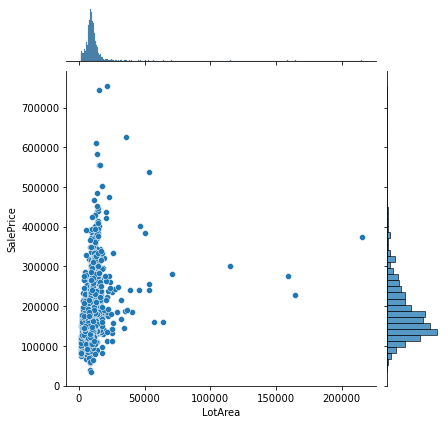

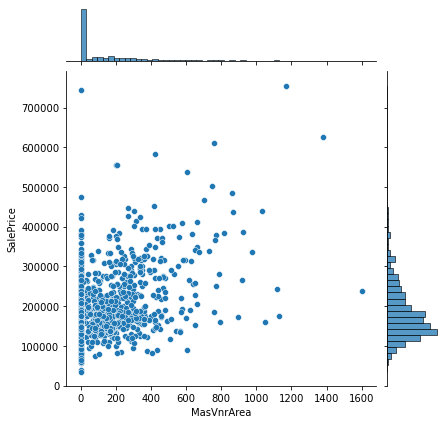

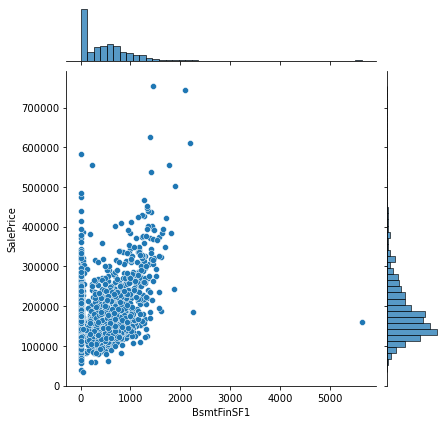

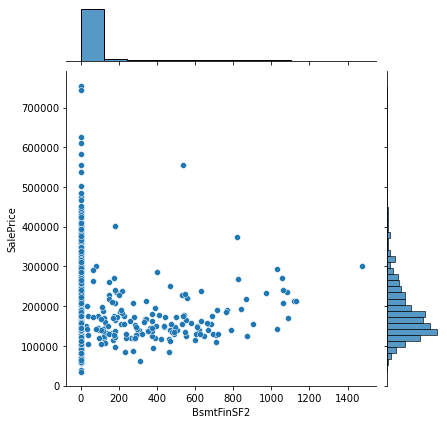

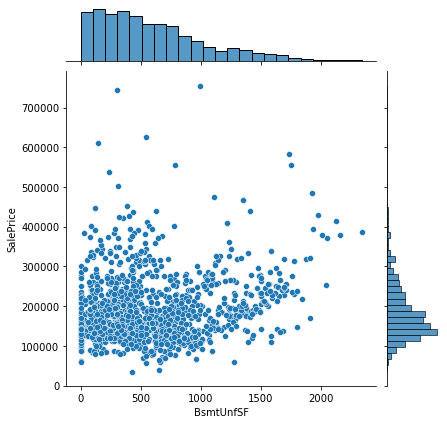

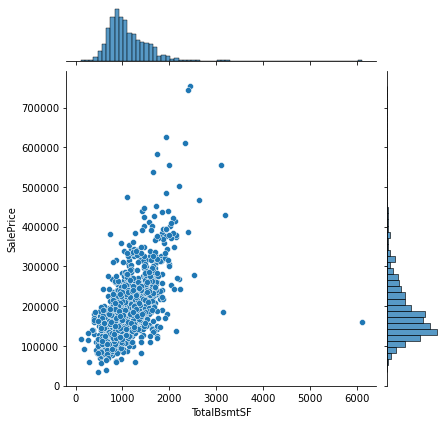

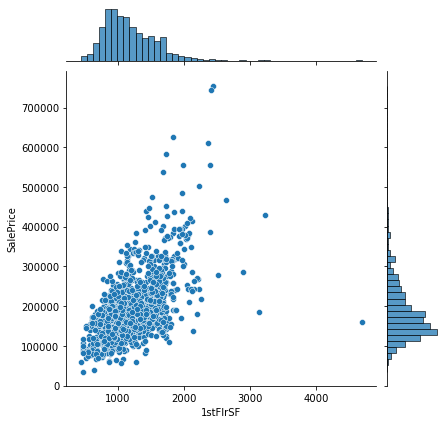

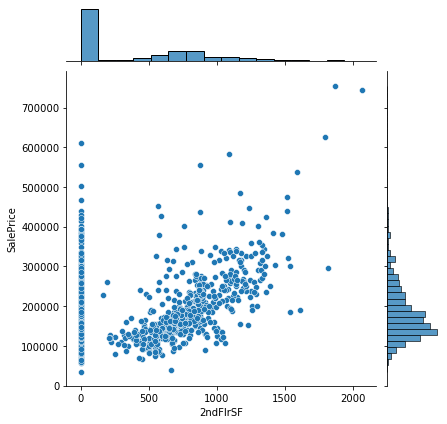

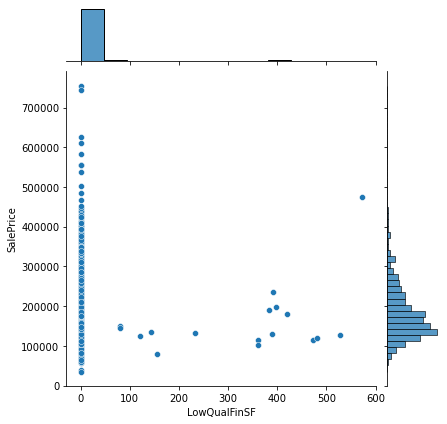

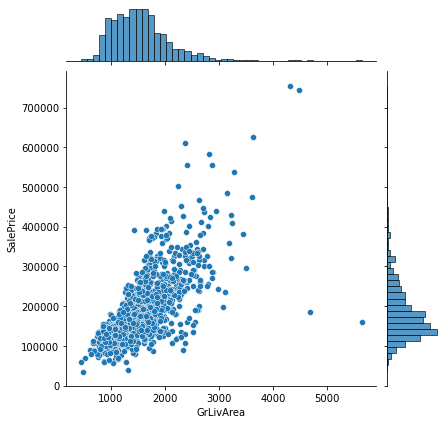

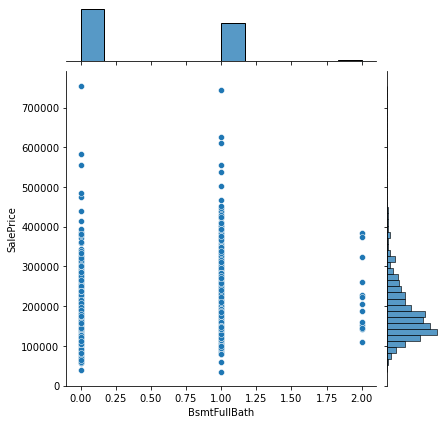

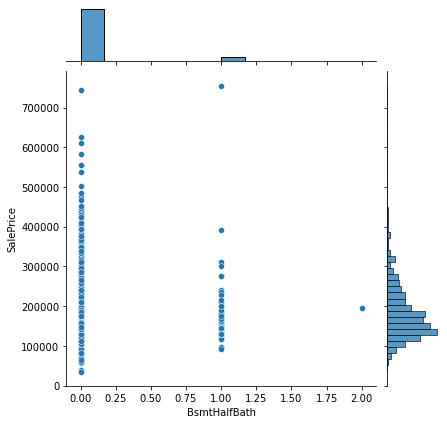

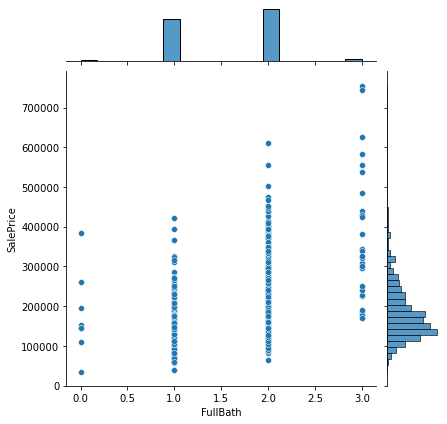

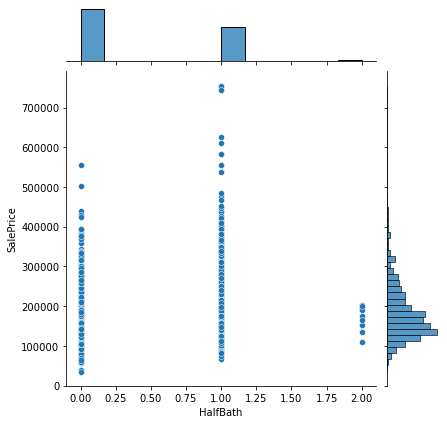

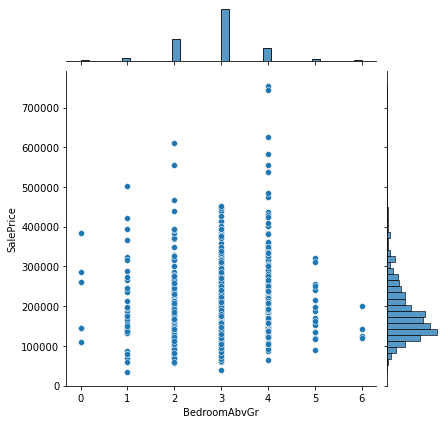

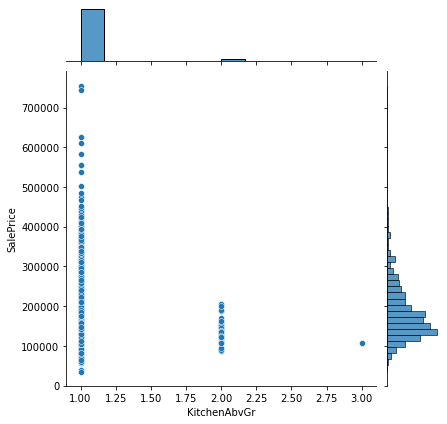

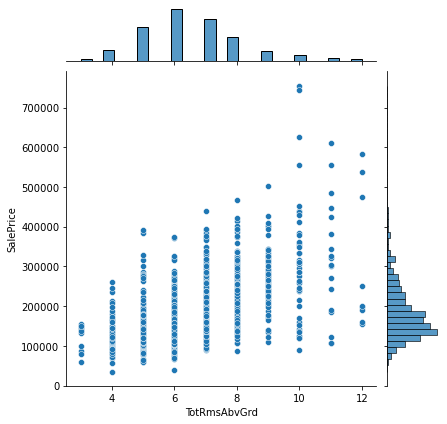

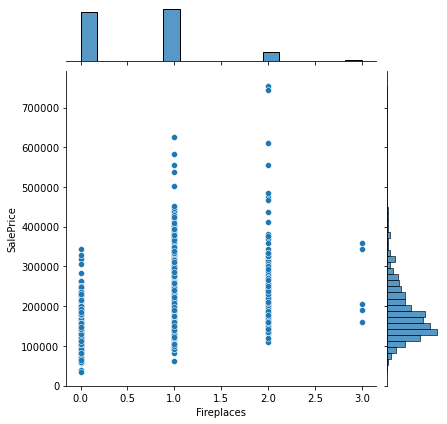

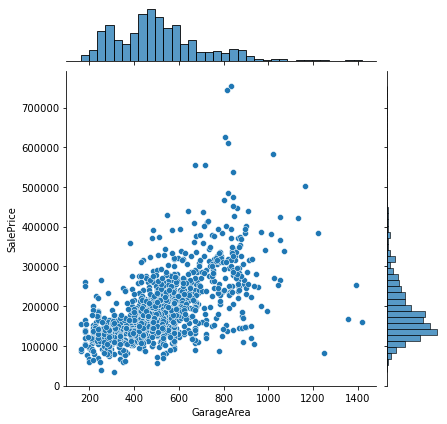

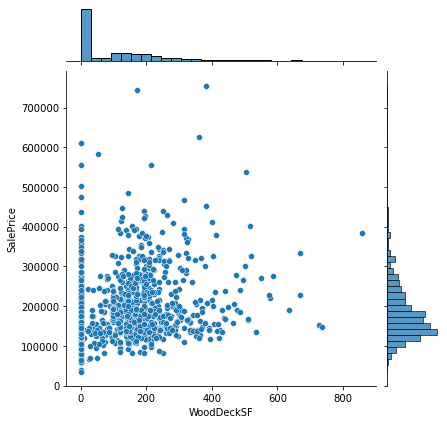

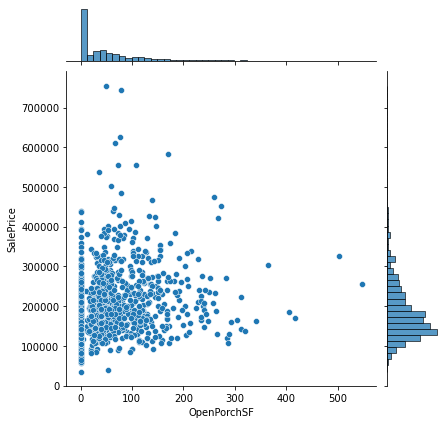

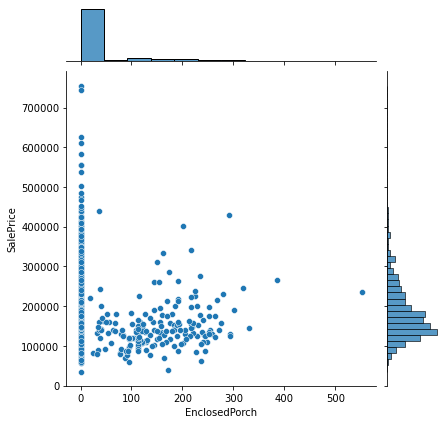

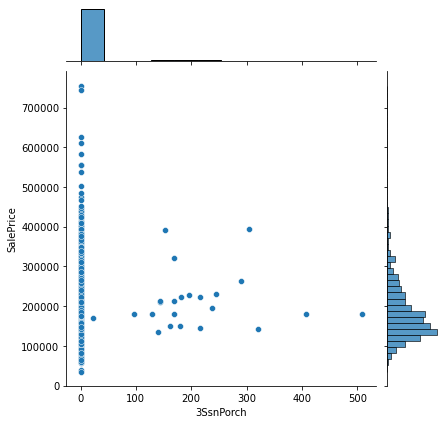

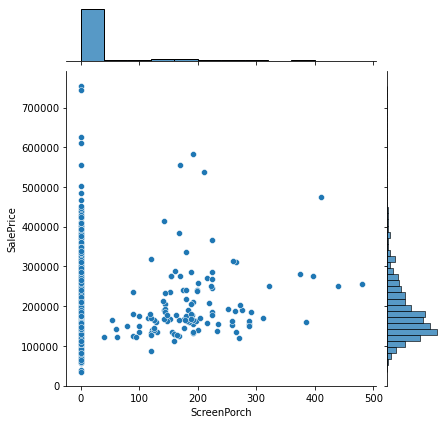

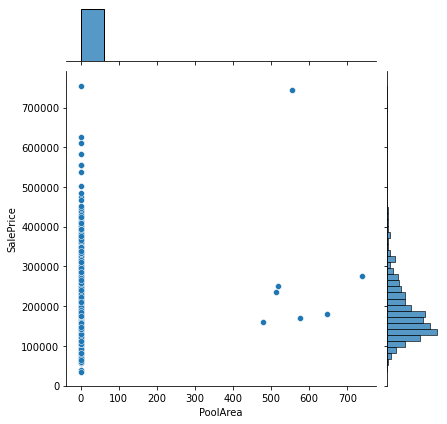

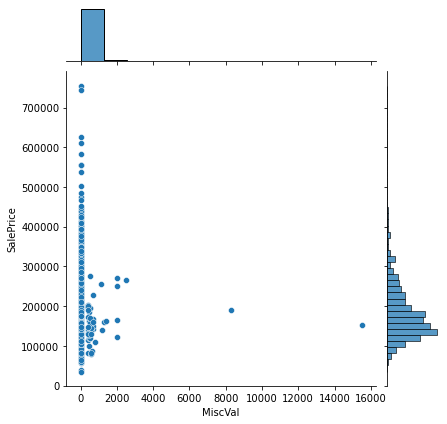

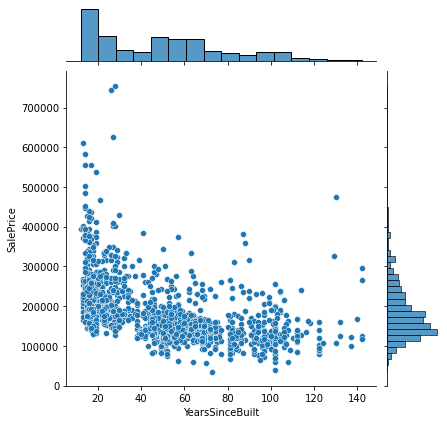

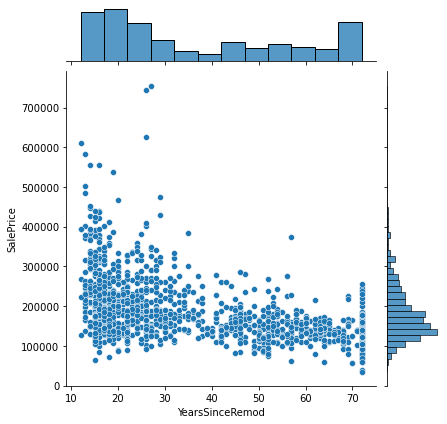

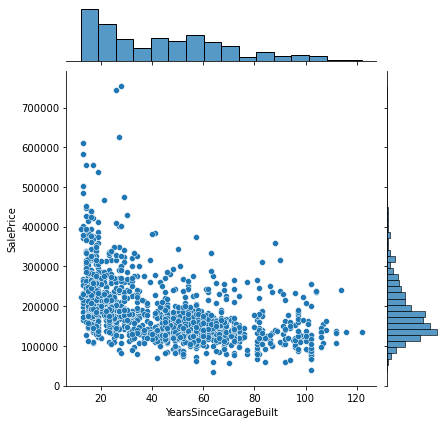

In [26]:
#plot against target variable to understand distribution and patterns
for i in num_cols:
    sns.jointplot(x=i, y=target_cols[0], data=raw_data)
    plt.show()

In [27]:
#Observations : 1. Lots of outliers. Some of these can also be categorical variables, but in practice they are ordinal

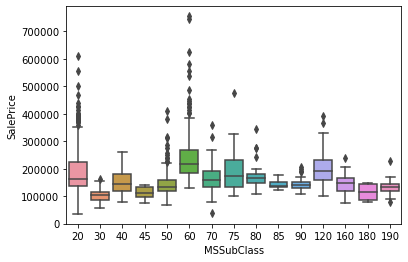

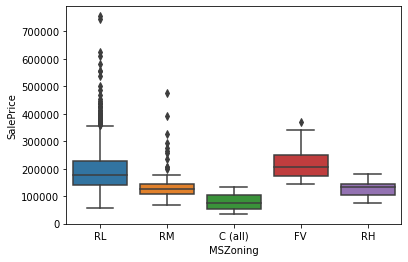

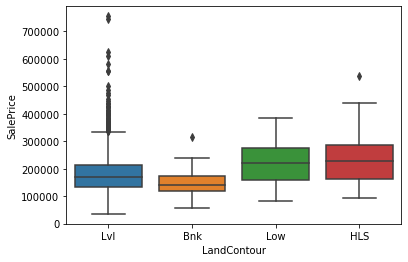

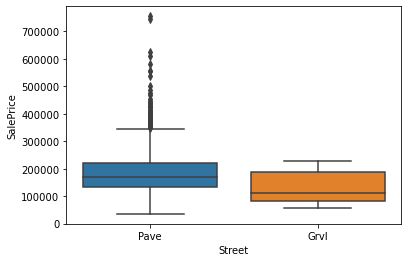

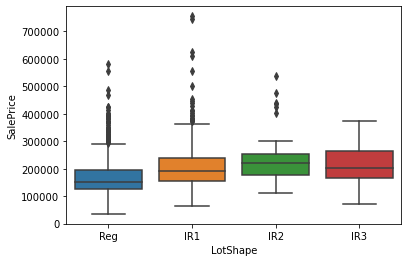

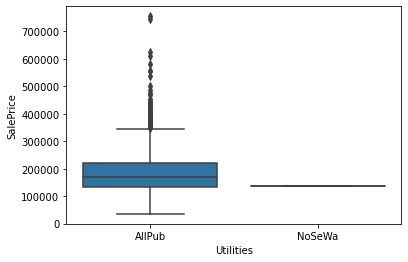

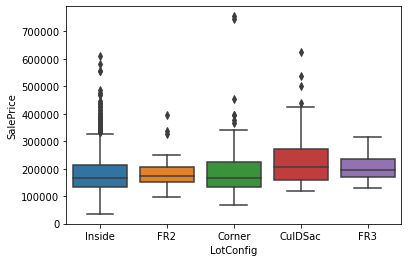

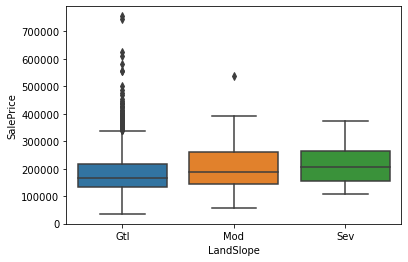

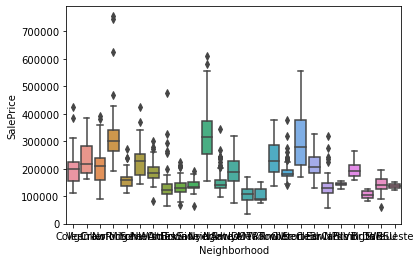

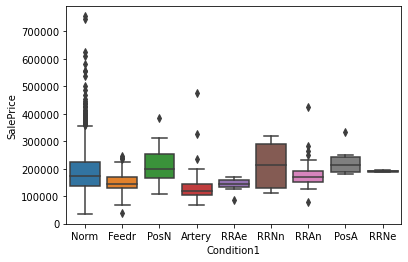

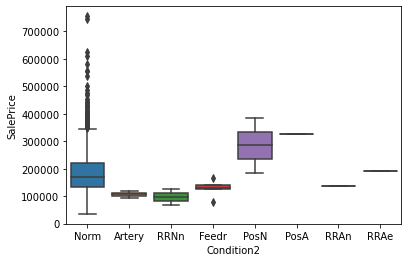

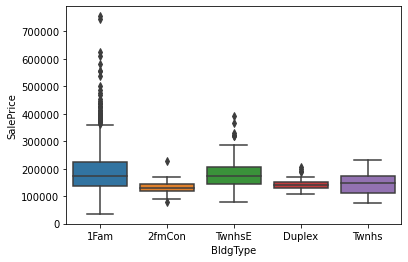

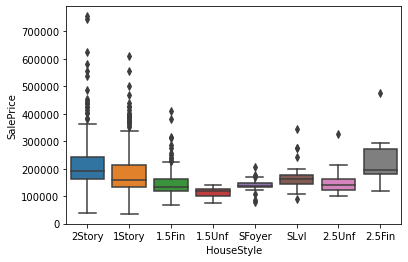

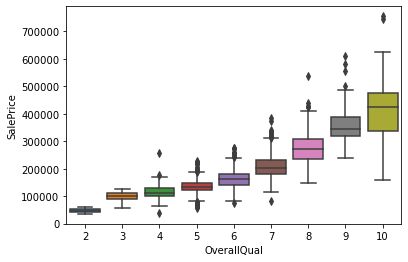

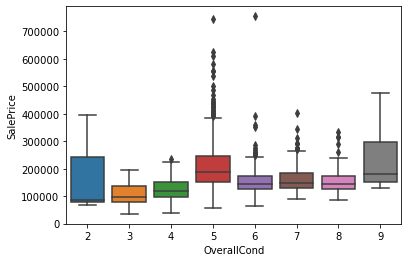

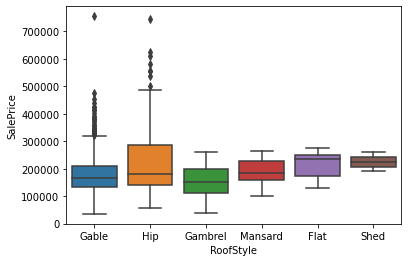

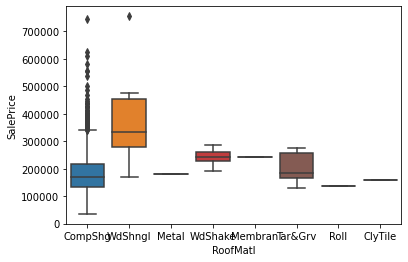

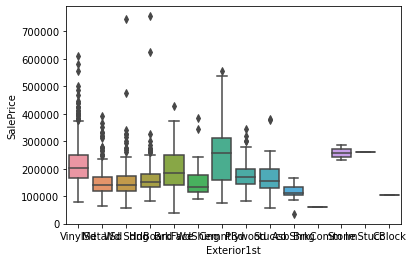

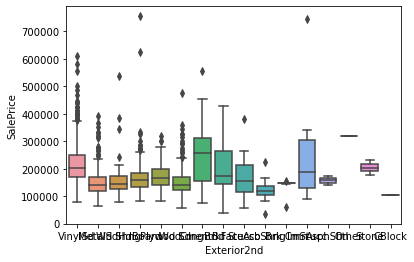

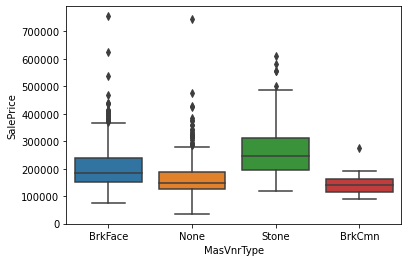

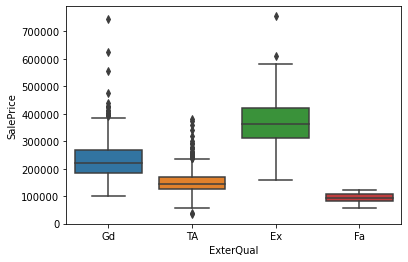

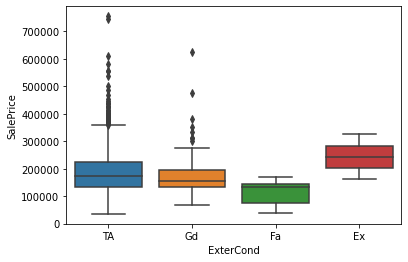

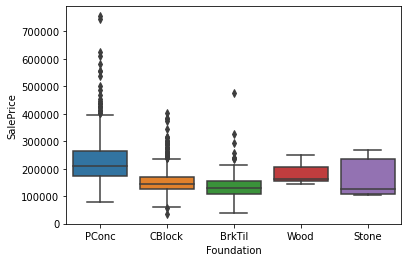

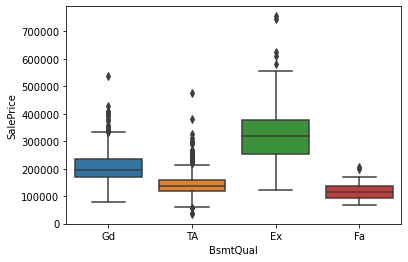

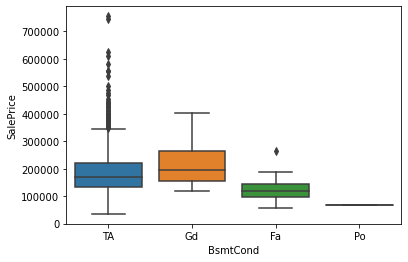

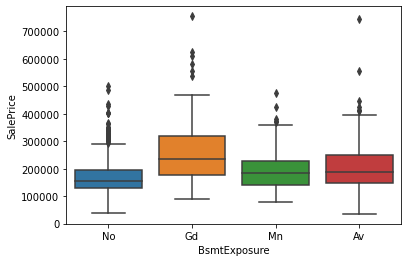

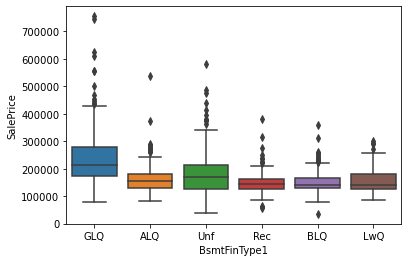

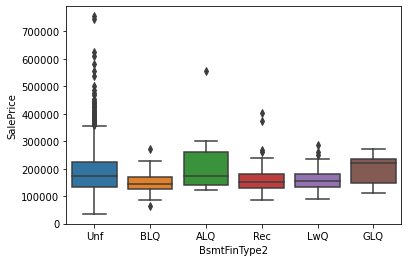

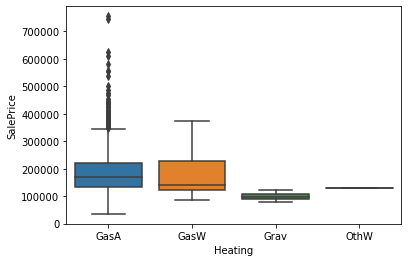

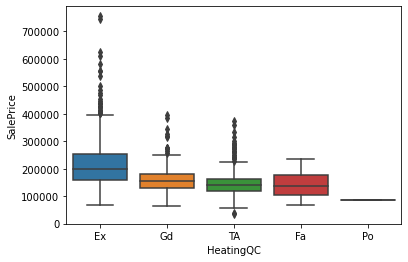

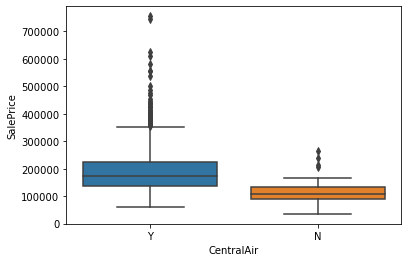

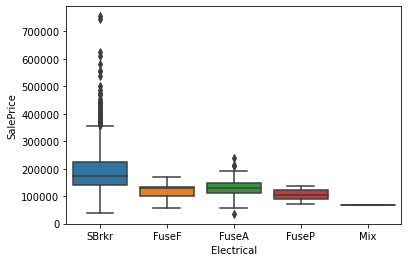

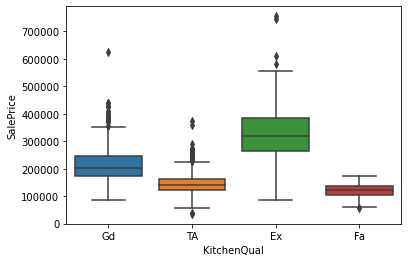

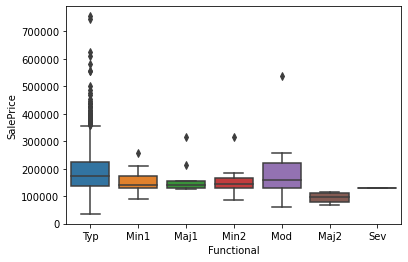

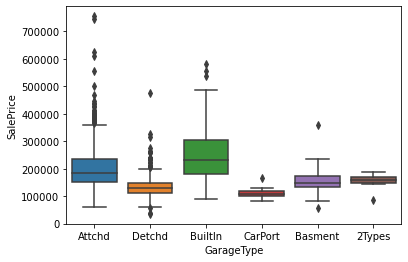

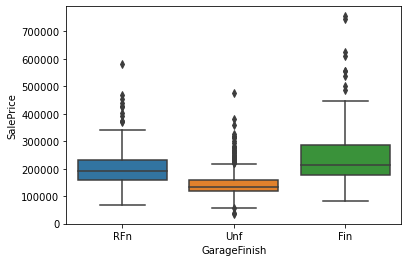

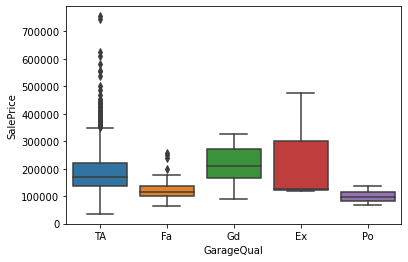

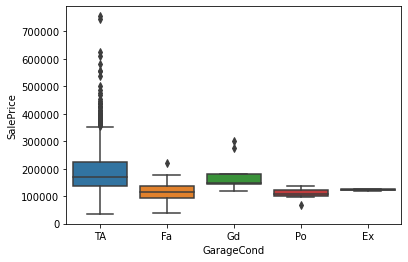

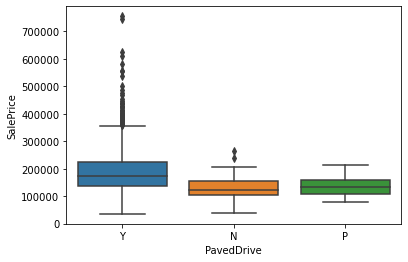

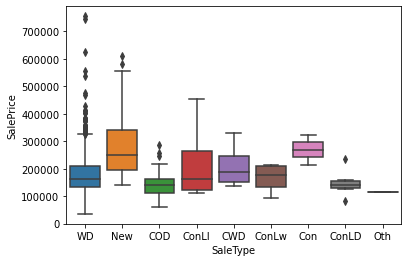

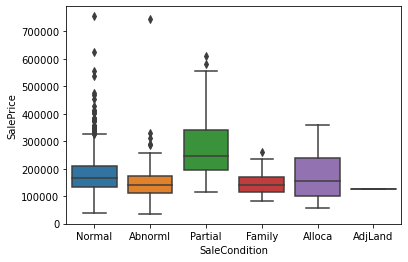

In [28]:
## Categorical Variables box plot
for i in cat_cols:
     sns.boxplot(x=i, y=target_cols[0], data=raw_data)
     plt.show()

In [29]:
## Most of the categorical variables seems to be adding value in determining the sale price. Lets convert them to dummies first.

In [30]:
raw_data2 = raw_data.copy()

In [31]:
dummy_cols=[]

In [32]:
for col in cat_cols:
    dummy_df = pd.get_dummies(raw_data2[col],drop_first=True,prefix=f'{col}')
    raw_data2 = pd.concat([raw_data2,dummy_df], axis=1)
    raw_data2.drop([col],axis=1,inplace=True)
    dummy_cols= dummy_cols + dummy_df.columns.to_list()

In [33]:
dummy_cols

['MSSubClass_30',
 'MSSubClass_40',
 'MSSubClass_45',
 'MSSubClass_50',
 'MSSubClass_60',
 'MSSubClass_70',
 'MSSubClass_75',
 'MSSubClass_80',
 'MSSubClass_85',
 'MSSubClass_90',
 'MSSubClass_120',
 'MSSubClass_160',
 'MSSubClass_180',
 'MSSubClass_190',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'Street_Pave',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'Utilities_NoSeWa',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown

In [34]:
raw_data2.shape,raw_data2.head(5)

((1338, 257),
    Id  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
 0   1     8450       2003          2003       196.0         706           0   
 1   2     9600       1976          1976         0.0         978           0   
 2   3    11250       2001          2002       162.0         486           0   
 3   4     9550       1915          1970         0.0         216           0   
 4   5    14260       2000          2000       350.0         655           0   
 
    BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
 0        150          856       856       854             0       1710   
 1        284         1262      1262         0             0       1262   
 2        434          920       920       866             0       1786   
 3        540          756       961       756             0       1717   
 4        490         1145      1145      1053             0       2198   
 
    BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  

In [35]:
### Use Z score to remove outliers and also drop variables selected above

In [36]:
z = np.abs(stats.zscore(raw_data2[num_cols]))
z_pass = raw_data2[num_cols][(z < 3).all(axis=1)]
raw_data2 = raw_data2.loc[z_pass.index]
raw_data2 = raw_data2[[x for x in raw_data2.columns if x not in drop_cols]]

In [37]:
all_pred_cols = dummy_cols + num_cols
all_pred_cols = [x for x in all_pred_cols if x not in drop_cols]
[x for x in all_pred_cols if x not in raw_data2.columns]

[]

In [38]:
# preparing test and train

In [39]:
y = raw_data2.loc[:, target_cols]
X = raw_data2.loc[:, all_pred_cols]
cols_in_order = raw_data2.loc[:, all_pred_cols].columns
# scale
std_scaler = StandardScaler()
# X = std_scaler.fit_transform(X) # dont scale.. ridiculous coefficient vales
# fitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

###  Linear Regression

In [40]:
# linear regression with all predictors
lm = LinearRegression()
lm.fit(X_train, y_train)

# predict train
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
# predict test
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9559500104969223
-3.992440281674536e+16


In [41]:
# overfitting on train

In [42]:
 pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [43]:
# coefficients = pd.concat([pd.DataFrame(cols_in_order),pd.DataFrame(np.round(np.transpose(lm.coef_),3))], axis = 1)
# coefficients.columns = ['var','coef']
# coefficients['coef']=[np.round(x,3) for x in coefficients['coef']]
# coefficients=coefficients.sort_values('coef')
for i,j in zip(cols_in_order,np.transpose(lm.coef_)):
    print(i,np.round(j[0],3))

MSSubClass_30 -13493.225
MSSubClass_40 233875376721211.94
MSSubClass_45 -13655676908818.42
MSSubClass_50 -1692163784437.958
MSSubClass_60 -1692163770714.314
MSSubClass_70 -1692163778011.348
MSSubClass_75 1343901867810.531
MSSubClass_80 -12305.395
MSSubClass_85 -6702.777
MSSubClass_90 -3359991117412.739
MSSubClass_120 -9754.439
MSSubClass_160 -1692163795956.906
MSSubClass_180 -19384.16
MSSubClass_190 -227455959410.393
MSZoning_FV 79974.145
MSZoning_RH 99608.079
MSZoning_RL 76417.995
MSZoning_RM 70082.354
LandContour_HLS 8490.056
LandContour_Low -6029.117
LandContour_Lvl 143.107
Street_Pave -3711063782.948
LotShape_IR2 9474.277
LotShape_IR3 -6616.142
LotShape_Reg 4298.643
Utilities_NoSeWa -5866435490.101
LotConfig_CulDSac 8641.1
LotConfig_FR2 -5817.252
LotConfig_FR3 -45715.643
LotConfig_Inside -537.181
LandSlope_Mod -6182.592
LandSlope_Sev 8678.411
Neighborhood_Blueste 2130559677.346
Neighborhood_BrDale 7416.712
Neighborhood_BrkSide 5686.001
Neighborhood_ClearCr -12614.069
Neighborhood_C

Summary : Linear regression is overfitting and has given a bad model. Lets try Lasso

### Lasso Regression

In [44]:
## Lets use Lasso with grid search
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


lasso = Lasso()
# cross validation
folds = 10
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 10 folds for each of 28 candidates, totalling 280 fits


C:\Users\tvss9\anaconda3\envs\adv_regression\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.810e+10, tolerance: 2.587e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\tvss9\anaconda3\envs\adv_regression\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.842e+10, tolerance: 2.695e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\tvss9\anaconda3\envs\adv_regression\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

C:\Users\tvss9\anaconda3\envs\adv_regression\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.496e+10, tolerance: 2.747e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\tvss9\anaconda3\envs\adv_regression\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.823e+10, tolerance: 2.727e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\tvss9\anaconda3\envs\adv_regression\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

C:\Users\tvss9\anaconda3\envs\adv_regression\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.831e+10, tolerance: 2.684e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\tvss9\anaconda3\envs\adv_regression\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.442e+10, tolerance: 2.654e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\tvss9\anaconda3\envs\adv_regression\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

C:\Users\tvss9\anaconda3\envs\adv_regression\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.367e+10, tolerance: 2.660e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\tvss9\anaconda3\envs\adv_regression\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.832e+10, tolerance: 2.605e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\tvss9\anaconda3\envs\adv_regression\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

C:\Users\tvss9\anaconda3\envs\adv_regression\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.603e+10, tolerance: 2.724e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\tvss9\anaconda3\envs\adv_regression\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.720e+10, tolerance: 2.684e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\tvss9\anaconda3\envs\adv_regression\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

C:\Users\tvss9\anaconda3\envs\adv_regression\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.106e+10, tolerance: 2.689e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\tvss9\anaconda3\envs\adv_regression\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.155e+10, tolerance: 2.660e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\tvss9\anaconda3\envs\adv_regression\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

C:\Users\tvss9\anaconda3\envs\adv_regression\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.866e+10, tolerance: 2.727e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\tvss9\anaconda3\envs\adv_regression\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.903e+10, tolerance: 2.724e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\tvss9\anaconda3\envs\adv_regression\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

C:\Users\tvss9\anaconda3\envs\adv_regression\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.341e+10, tolerance: 2.605e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\tvss9\anaconda3\envs\adv_regression\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.968e+10, tolerance: 2.747e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\tvss9\anaconda3\envs\adv_regression\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

C:\Users\tvss9\anaconda3\envs\adv_regression\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.320e+08, tolerance: 2.747e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\tvss9\anaconda3\envs\adv_regression\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.958e+08, tolerance: 2.727e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\tvss9\anaconda3\envs\adv_regression\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [45]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.091,0.007,0.003,0.000,0.000,{'alpha': 0.0001},-17999.400,-15493.158,-14357.597,-15669.624,-15502.079,-15997.546,-14734.534,-14838.400,-14017.964,-18473.710,-15708.401,1394.890,27,-9086.329,-9716.763,-9368.993,-9529.623,-9513.466,-9381.949,-9744.994,-9650.179,-9631.322,-9231.128,-9485.475,205.005
1,0.091,0.007,0.003,0.000,0.001,{'alpha': 0.001},-17999.459,-15483.896,-14357.526,-15668.451,-15501.733,-16003.861,-14725.816,-14850.172,-14017.615,-18468.486,-15707.701,1394.083,26,-9086.346,-9716.779,-9368.999,-9529.625,-9513.468,-9381.953,-9745.001,-9650.188,-9631.326,-9231.128,-9485.481,205.005
2,0.089,0.006,0.003,0.001,0.010,{'alpha': 0.01},-18000.160,-15404.406,-14355.925,-15656.707,-15496.890,-16034.048,-14634.723,-14960.935,-14014.091,-18416.100,-15697.399,1387.077,25,-9086.591,-9716.918,-9369.239,-9529.712,-9513.619,-9382.092,-9745.094,-9650.304,-9631.425,-9231.190,-9485.618,204.977
3,0.089,0.006,0.003,0.000,0.050,{'alpha': 0.05},-18003.931,-15097.445,-14346.720,-15301.551,-15465.116,-16023.561,-14628.371,-14963.193,-13998.309,-18209.486,-15603.768,1364.298,24,-9087.678,-9717.873,-9370.425,-9530.094,-9514.653,-9382.764,-9745.977,-9650.928,-9631.776,-9231.464,-9486.363,204.947
4,0.089,0.007,0.003,0.000,0.100,{'alpha': 0.1},-18009.277,-15034.351,-14333.925,-15241.428,-15433.380,-16007.760,-14621.262,-14947.780,-13980.205,-18137.156,-15574.652,1359.703,23,-9089.192,-9719.343,-9372.229,-9530.680,-9515.931,-9383.386,-9747.027,-9651.770,-9632.395,-9232.373,-9487.433,204.847


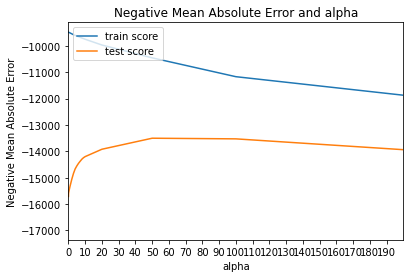

In [46]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xlim(0, 200)
plt.xticks(np.arange(0, 200, 10))
# plt.grid(color='r', linestyle='-', linewidth=1)
plt.show()

In [47]:
# at around 50 the decrease/increase of error between test and train seems optimal. lets build at model at 50
alpha =50
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred_lasso = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_lasso))

0.9477472338955085
0.9081472236328216


In [48]:
## Good R Sqaured values - Lets look at coefs

In [49]:
np.transpose(lasso.coef_)

array([-2.69894596e+03,  0.00000000e+00, -0.00000000e+00, -3.54773060e+03,
        2.86934592e+03,  1.86194193e+03, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -1.28297504e+04,
       -0.00000000e+00,  0.00000000e+00,  5.01328496e+03,  1.51147690e+04,
        3.46835253e+03, -0.00000000e+00,  6.84831876e+03, -3.42275382e+03,
        0.00000000e+00,  0.00000000e+00,  5.36832576e+03, -0.00000000e+00,
        1.63460194e+03,  0.00000000e+00,  6.36206804e+03, -2.98249843e+03,
       -1.72679587e+03, -9.00392391e+02, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  8.41169678e+03,  9.92695594e+03, -0.00000000e+00,
       -2.31332564e+03,  2.78680219e+04, -7.86057507e+03, -0.00000000e+00,
       -0.00000000e+00, -1.17609448e+04, -5.11014456e+03, -4.64234562e+03,
        5.36132848e+03, -5.06369538e+03,  9.70867614e+03,  9.52164113e+03,
       -2.49025518e+03,  0.00000000e+00,  0.00000000e+00, -8.46340813e+02,
        8.93836465e+03,  

In [50]:
non_zero_lasso_vars = []

In [51]:
for i,j in zip(cols_in_order,np.transpose(lasso.coef_)):
    if abs(j) != 0 :
        non_zero_lasso_vars.append(i)
    print(i,np.round(j,3))

MSSubClass_30 -2698.946
MSSubClass_40 0.0
MSSubClass_45 -0.0
MSSubClass_50 -3547.731
MSSubClass_60 2869.346
MSSubClass_70 1861.942
MSSubClass_75 -0.0
MSSubClass_80 0.0
MSSubClass_85 0.0
MSSubClass_90 -0.0
MSSubClass_120 -0.0
MSSubClass_160 -12829.75
MSSubClass_180 -0.0
MSSubClass_190 0.0
MSZoning_FV 5013.285
MSZoning_RH 15114.769
MSZoning_RL 3468.353
MSZoning_RM -0.0
LandContour_HLS 6848.319
LandContour_Low -3422.754
LandContour_Lvl 0.0
Street_Pave 0.0
LotShape_IR2 5368.326
LotShape_IR3 -0.0
LotShape_Reg 1634.602
Utilities_NoSeWa 0.0
LotConfig_CulDSac 6362.068
LotConfig_FR2 -2982.498
LotConfig_FR3 -1726.796
LotConfig_Inside -900.392
LandSlope_Mod -0.0
LandSlope_Sev 0.0
Neighborhood_Blueste 0.0
Neighborhood_BrDale 8411.697
Neighborhood_BrkSide 9926.956
Neighborhood_ClearCr -0.0
Neighborhood_CollgCr -2313.326
Neighborhood_Crawfor 27868.022
Neighborhood_Edwards -7860.575
Neighborhood_Gilbert -0.0
Neighborhood_IDOTRR -0.0
Neighborhood_MeadowV -11760.945
Neighborhood_Mitchel -5110.145
Neigh

In [52]:
len(non_zero_lasso_vars)

122

In [53]:
## Summary - Lasso seems to perform well. Lots of variables have  as coefficients. Lets try ridge regression

### Ridge Regression

In [54]:

## Lets use Ridge with grid search
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 10
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 10 folds for each of 28 candidates, totalling 280 fits


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [55]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.007,0.001,0.003,0.000,0.000,{'alpha': 0.0001},-17755.734,-15088.063,-14504.122,-15263.928,-15673.693,-16134.392,-14639.585,-14971.945,-14052.488,-18224.001,-15630.795,1307.735,26,-9080.990,-9708.178,-9361.194,-9526.863,-9508.917,-9380.473,-9744.369,-9644.617,-9630.754,-9229.487,-9481.584,205.128
1,0.006,0.001,0.003,0.000,0.001,{'alpha': 0.001},-17759.136,-15084.711,-14488.482,-15254.424,-15646.472,-16113.991,-14627.626,-14963.149,-14026.591,-18209.097,-15617.368,1310.714,24,-9081.484,-9710.233,-9363.076,-9526.801,-9509.902,-9380.667,-9745.134,-9645.776,-9631.028,-9229.955,-9482.406,205.304
2,0.008,0.004,0.003,0.001,0.010,{'alpha': 0.01},-17783.377,-15028.155,-14362.536,-15167.115,-15463.957,-15949.116,-14521.084,-14856.827,-13807.777,-18074.223,-15501.417,1338.143,23,-9098.656,-9729.596,-9389.223,-9535.834,-9517.690,-9385.202,-9752.223,-9656.988,-9634.595,-9239.882,-9493.989,203.597
3,0.008,0.003,0.004,0.002,0.050,{'alpha': 0.05},-17784.920,-14682.816,-14090.368,-14900.771,-15115.860,-15689.847,-14221.773,-14520.618,-13277.820,-17619.632,-15190.442,1395.855,22,-9160.127,-9786.951,-9459.900,-9569.343,-9541.614,-9422.717,-9805.454,-9702.138,-9682.314,-9282.238,-9541.280,202.424
4,0.007,0.002,0.003,0.000,0.100,{'alpha': 0.1},-17760.933,-14336.800,-13985.404,-14657.572,-14914.163,-15575.164,-13996.036,-14338.823,-13000.237,-17201.001,-14976.613,1408.209,21,-9207.034,-9822.324,-9509.277,-9599.006,-9560.853,-9461.716,-9849.374,-9750.064,-9719.542,-9315.900,-9579.509,202.051


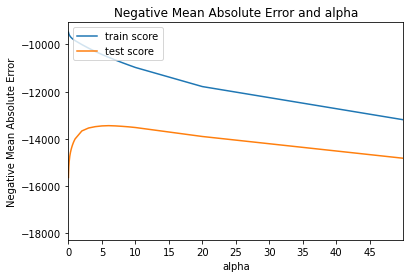

In [56]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xlim(0, 50)
plt.xticks(np.arange(0, 50, 5))
# plt.grid(color='r', linestyle='-', linewidth=1)
plt.show()

In [57]:
# at around 50 the decrease/increase of error between test and train seems optimal. lets build at model at 50
alpha =5
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train) 

y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred_lasso = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_lasso))

0.947867300930861
0.9090477981392575


In [58]:
for i,j in zip(cols_in_order,np.transpose(ridge.coef_)):
    print(i,np.round(j,3))

MSSubClass_30 [-4545.192]
MSSubClass_40 [0.]
MSSubClass_45 [-334.542]
MSSubClass_50 [-3908.385]
MSSubClass_60 [5751.043]
MSSubClass_70 [5621.522]
MSSubClass_75 [-610.776]
MSSubClass_80 [-268.566]
MSSubClass_85 [641.661]
MSSubClass_90 [-3386.352]
MSSubClass_120 [-3206.866]
MSSubClass_160 [-10251.438]
MSSubClass_180 [-2071.649]
MSSubClass_190 [367.896]
MSZoning_FV [3959.551]
MSZoning_RH [10574.138]
MSZoning_RL [2829.832]
MSZoning_RM [-1890.794]
LandContour_HLS [9018.134]
LandContour_Low [-4528.201]
LandContour_Lvl [-457.771]
Street_Pave [0.]
LotShape_IR2 [5004.823]
LotShape_IR3 [-3339.157]
LotShape_Reg [1792.556]
Utilities_NoSeWa [0.]
LotConfig_CulDSac [5541.383]
LotConfig_FR2 [-3804.471]
LotConfig_FR3 [-5558.403]
LotConfig_Inside [-1331.82]
LandSlope_Mod [-1852.091]
LandSlope_Sev [-36.086]
Neighborhood_Blueste [0.]
Neighborhood_BrDale [7333.531]
Neighborhood_BrkSide [7195.471]
Neighborhood_ClearCr [-2455.227]
Neighborhood_CollgCr [-6782.606]
Neighborhood_Crawfor [18806.209]
Neighborhood

In [59]:
## The r squared are similar, yet the number of variables that have zero coefficient is higher in lasso. Lets use RFE To select about 25 variables from non zero vars

### RFE Variable Selection

In [60]:
X_train_lm = X_train[non_zero_lasso_vars]
X_test_lm = X_test[non_zero_lasso_vars]

In [61]:
lm = LinearRegression()
# lm.fit(X_train_lm, y_train)

In [62]:
rfe = RFE(LinearRegression(),n_features_to_select=25)
rfe.fit(X_train_lm,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=25)

In [63]:
X_train_lm.columns[rfe.support_]

Index(['MSSubClass_30', 'MSSubClass_60', 'LotConfig_FR3',
       'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_StoneBr',
       'BldgType_Twnhs', 'BldgType_TwnhsE', 'OverallQual_8', 'OverallQual_9',
       'OverallQual_10', 'OverallCond_3', 'Exterior1st_BrkFace',
       'Exterior2nd_CmentBd', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_TA',
       'BsmtCond_Gd', 'BsmtCond_TA', 'BsmtExposure_Gd', 'KitchenQual_TA',
       'FullBath'],
      dtype='object')

In [64]:
# Use RFE columns to make a linear model. Lets use stats model

### Modeling Iterations

In [65]:
def stats_model_lr(col_list):
    X_train_lm = sm.add_constant(X_train[col_list])
    lr = sm.OLS(y_train, X_train_lm).fit()
    print(lr.summary())
    print('vif')
    vif = pd.DataFrame()
    vif['variables'] = X_train[col_list].columns
    vif['VIF'] = [variance_inflation_factor(X_train[col_list].values, i) for i in range(X_train[col_list].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)
    return lr

In [66]:
#Model1
model1_vars = X_train_lm.columns[rfe.support_].to_list()
stats_model_lr(model1_vars)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     139.7
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.08e-244
Time:                        22:55:42   Log-Likelihood:                -7976.9
No. Observations:                 688   AIC:                         1.601e+04
Df Residuals:                     662   BIC:                         1.612e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.412e+05 

In [67]:
#Model2 - Remove highest vif
model2_vars = [x for x in model1_vars if x not in ['BsmtCond_TA']]
stats_model_lr(model2_vars)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     142.8
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          2.68e-243
Time:                        22:55:42   Log-Likelihood:                -7982.8
No. Observations:                 688   AIC:                         1.602e+04
Df Residuals:                     663   BIC:                         1.613e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.641e+05 

In [68]:
#Model3 - Remove highest vif
model3_vars = [x for x in model2_vars if x not in ['FullBath']]
stats_model_lr(model3_vars)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     123.3
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          7.24e-222
Time:                        22:55:42   Log-Likelihood:                -8037.0
No. Observations:                 688   AIC:                         1.612e+04
Df Residuals:                     664   BIC:                         1.623e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.239e+05 

In [69]:
#Model4 - Remove highest p value > 0.05
model4_vars = [x for x in model3_vars if x not in ['LotConfig_FR3']]
stats_model_lr(model4_vars)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     128.9
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          9.08e-223
Time:                        22:55:42   Log-Likelihood:                -8037.3
No. Observations:                 688   AIC:                         1.612e+04
Df Residuals:                     665   BIC:                         1.622e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.239e+05 

In [70]:
final_lr=stats_model_lr(model4_vars)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     128.9
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          9.08e-223
Time:                        22:55:42   Log-Likelihood:                -8037.3
No. Observations:                 688   AIC:                         1.612e+04
Df Residuals:                     665   BIC:                         1.622e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.239e+05 

In [71]:
y_train_predict = final_lr.predict(sm.add_constant(X_train[model4_vars]))
y_test_predict = final_lr.predict(sm.add_constant(X_test[model4_vars]))

In [72]:
y_test_predict

911    189714.101
680    131499.047
1098   132468.793
656    158925.927
413     70784.874
          ...    
1144   184212.968
835    184212.968
474    296218.382
876    157841.820
1366   211965.487
Length: 296, dtype: float64

Text(0, 0.5, 'SalePrice')

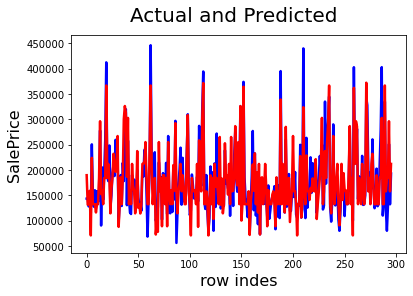

In [77]:
c = [i for i in range(0,y_test.shape[0],1)]
fig = plt.figure()
plt.plot(c, y_test['SalePrice'], color="blue", linewidth=2.5, linestyle="-")
plt.plot(c, y_test_predict, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20) 
plt.xlabel('row indes', fontsize=16)    
plt.ylabel('SalePrice', fontsize=16)    

In [74]:
print(metrics.r2_score(y_true=y_train, y_pred=y_train_predict))
print(metrics.r2_score(y_true=y_test, y_pred=y_test_predict))

0.8100590794060606
0.7679086362828427


In [75]:
model4_vars

['MSSubClass_30',
 'MSSubClass_60',
 'Neighborhood_Crawfor',
 'Neighborhood_MeadowV',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_StoneBr',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'OverallQual_8',
 'OverallQual_9',
 'OverallQual_10',
 'OverallCond_3',
 'Exterior1st_BrkFace',
 'Exterior2nd_CmentBd',
 'BsmtQual_Fa',
 'BsmtQual_Gd',
 'BsmtQual_TA',
 'BsmtCond_Gd',
 'BsmtExposure_Gd',
 'KitchenQual_TA']

Conclusion:
1. Data cleaning, including missing value treatment, collinearity check, dummy variable creation and outlier treatment was done.
2. Simple Linear Regression, Lasso and Ridge Regression were applied.
3. Simple Linear Regression was overfitting and Ridge Regression was very complex using almost all variables
4. Lasso variables were taken as a base and RFE was used to get to 25 variables.
5. Further iteration on Simple Linear Regression were done to ensure, no collinear variables are present and all variables are significant
6. The optimal value of alpha for lasso is 50 while its 5 for Ridge
6. The final model has a r squared of 81 on train and 77 on test
7. The most important variables are
'MSSubClass_30',
 'MSSubClass_60',
 'Neighborhood_Crawfor',
 'Neighborhood_MeadowV',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_StoneBr',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'OverallQual_8',
 'OverallQual_9',
 'OverallQual_10',
 'OverallCond_3',
 'Exterior1st_BrkFace',
 'Exterior2nd_CmentBd',
 'BsmtQual_Fa',
 'BsmtQual_Gd',
 'BsmtQual_TA',
 'BsmtCond_Gd',
 'BsmtExposure_Gd',
 'KitchenQual_TA'